In [1]:
!pip install yfinance

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

**Exercise 1**

Develop the Fama-French three-factor model for Microsoft using the historical price data from 01/01/2010 - 31/12/2016. The monthly data of MKT, SMB, and HML  is in the ffMonthly.pkl file.

*Expected result*

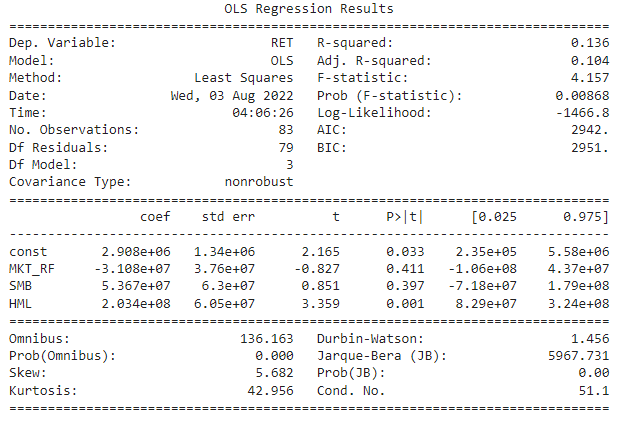

In [11]:
## monthly data of MKT-Rf, SMB, HML, Rf
ff=pd.read_pickle('/content/drive/MyDrive/Financial Engineering Python/data/ffMonthly.pkl')
ff.head()

,MKT_RF,SMB,HML,RF
192607,0.0296,-0.0230,-0.0287,0.0022
192608,0.0264,-0.0140,0.0419,0.0025
192609,0.0036,-0.0132,0.0001,0.0023
192610,-0.0324,0.0004,0.0051,0.0032
192611,0.0253,-0.0020,-0.0035,0.0031


In [12]:
## Read the daily price data and calculate the log return
begdate= '2010-01-01'
enddate= '2016-12-31'
dataMSFT = yf.download('MSFT;',begdate,enddate)['Adj Close']
logret = np.log(dataMSFT[1:].values / dataMSFT[:-1].values) #Calculate the log daily returns

## Read the monthly data of MKT_Rf, SMB, HML, Rf
ff=pd.read_pickle('/content/drive/MyDrive/Financial Engineering Python/data/ffMonthly.pkl')
ff.head()

## Make Date variable for groupby() operation
ddate=[]
d0=dataMSFT.index

## Calculate monthly returns and convert them to monthly ones before
for i in range(0,np.size(logret)):
  # print(d0[i])
  x=''.join([d0[i].strftime("%Y"),d0[i].strftime("%m")])## change all y/m/d (e.g. 1996/01/01) -> ym (e.g. 199601) so we can group the same y/m
  # print(x)
  ddate.append(int(x))

print(ddate[:10])

ret_daily=pd.DataFrame(logret, index=np.array(ddate),columns=['RET'])
ret_monthly=np.exp(ret_daily.groupby(ret_daily.index).sum())   #Convert the daily returns to monthly ones

## Merge the monthly returns with the monthly Fama-French three-factor time series
final=pd.merge(ret_monthly, ff, left_index=True, right_index=True) # merge only when they have the same index (same year and month)
y=final['RET']
x=final[['MKT_RF','SMB','HML']]

## Fit the Fama-French model and print the result
x=sm.add_constant(x) #Add a column of 1s.If the line is missing, the model will have a zero intercept.
model = sm.OLS(y,x)
results= model.fit()
print(results.summary())


[*********************100%%**********************]  1 of 1 completed
[201001, 201001, 201001, 201001, 201001, 201001, 201001, 201001, 201001, 201001]
                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     18.35
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.96e-09
Time:                        03:53:44   Log-Likelihood:                 127.23
No. Observations:                  83   AIC:                            -246.5
Df Residuals:                      79   BIC:                            -236.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

**Exercise 2**

Calculate the Sortino ratio for the IBM data in the previous section.

*Expected result if*
* Use the  percentage changes from one period to the next as a return: -37.38412252655367
* Use the daily log return: -37.11620602721301

In [13]:
##Enter your code here
begdate= '2012-01-01'
enddate= '2016-12-31'
dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
retIBM = np.log(dataIBM[1:].values / dataIBM[:-1].values) #Calculate the log daily returns

rf=0.02
ret_lower=retIBM[retIBM-rf<0] #Ri where Ri < Rf

m=len(ret_lower) # Get the numner of the low Ri
total=0.0
for i in np.arange(m):
  total+=(ret_lower[i]-rf)**2 #sum of the square for the LPSD nominator
LPSD=total/(m-1)
print("LPSD=",LPSD)

sortino = (np.mean(retIBM)-rf)/LPSD  # mean(x)-mean(constant) =  mean(x) - contstant
print("Sortino=",sortino)

[*********************100%%**********************]  1 of 1 completed
LPSD= 0.000555167967963748
Sortino= -36.005066183670785
